In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"E:\\Infosys\\Global air pollution dataset\\global air pollution dataset.csv")

In [6]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.shape

(23463, 12)

In [9]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [10]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [12]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

filling missing value

In [22]:
df_clean = df.copy()

# Separate numerical and categorical columns
num_cols = df_clean.select_dtypes(include='number').columns
cat_cols = df_clean.select_dtypes(include='object').columns

# Fill numerical missing values with median
for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Fill categorical missing values
for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna('Unknown', inplace=True)
        
# Strip whitespace from categorical columns
df_clean[cat_cols] = df_clean[cat_cols].apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

print("\nMissing Values After Imputation:")
print(df_clean.isnull().sum())


Missing Values After Imputation:
Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


OUTLEIRS

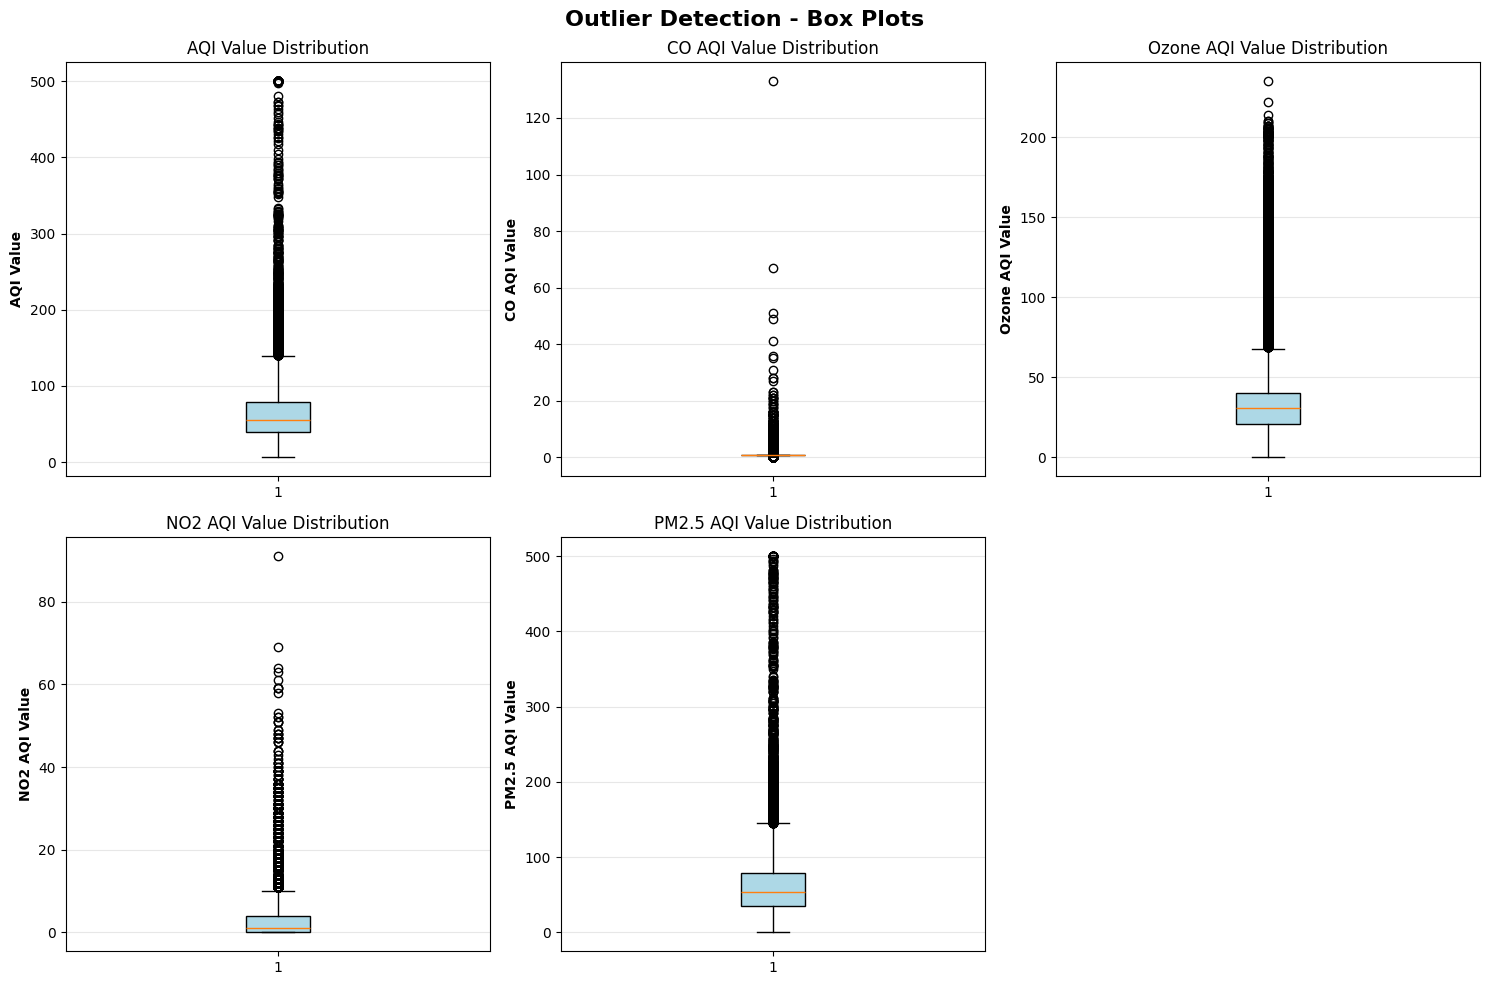

Outliers in AQI Value: 2935
Outliers in CO AQI Value: 8596
Outliers in Ozone AQI Value: 1513
Outliers in NO2 AQI Value: 1681
Outliers in PM2.5 AQI Value: 2641


In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

aqi_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

for idx, col in enumerate(aqi_cols):
    row, col_pos = idx // 3, idx % 3
    ax = axes[row, col_pos]
    
    box = ax.boxplot(df_clean[col], vert=True, patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    ax.set_ylabel(col, fontweight='bold')
    ax.set_title(f'{col} Distribution')
    ax.grid(axis='y', alpha=0.3)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

# Identify outliers using IQR method
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

outlier_counts = {}
for col in aqi_cols:
    outliers = identify_outliers_iqr(df_clean, col)
    outlier_counts[col] = outliers.sum()
    print(f"Outliers in {col}: {outliers.sum()}")

# Cap outliers at 95th and 5th percentiles
for col in aqi_cols:
    p95 = df_clean[col].quantile(0.95)
    p5 = df_clean[col].quantile(0.05)
    df_clean[col] = df_clean[col].clip(lower=p5, upper=p95)

VISUALIZATIONS

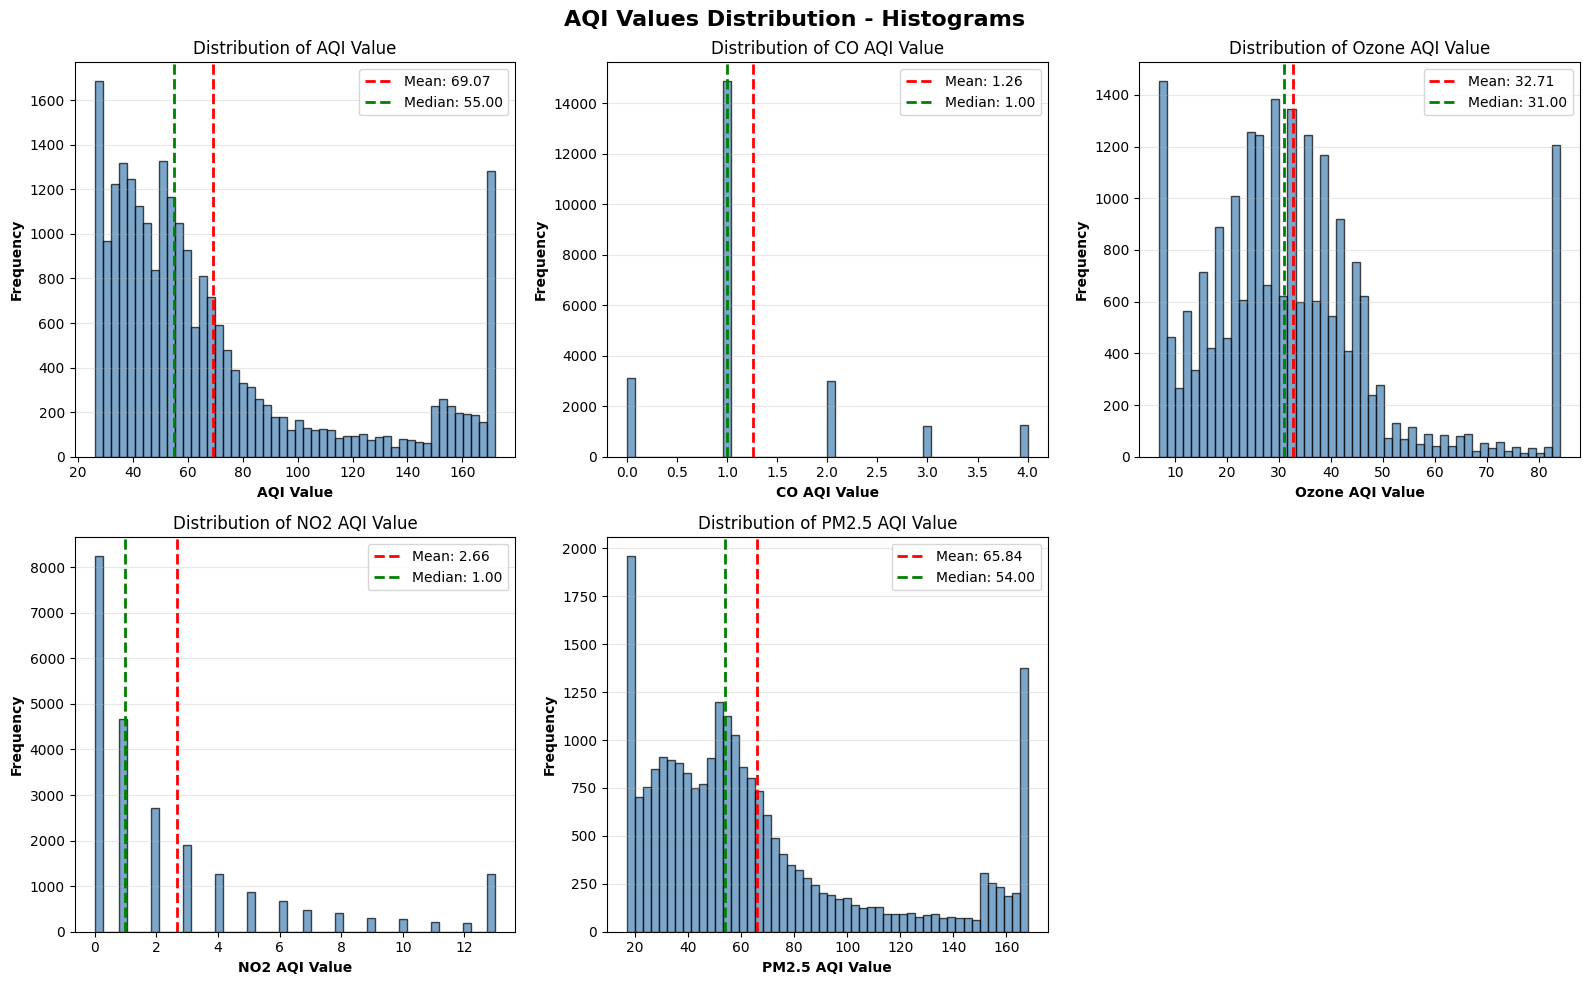


STATISTICAL SUMMARY
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      69.072923      1.260794        32.711290       2.662064   
std       42.187589      0.940820        17.836768       3.588165   
min       26.000000      0.000000         7.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      172.000000      4.000000        84.000000      13.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         65.838597  
std          42.925672  
min          17.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         168.000000  


In [24]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('AQI Values Distribution - Histograms', fontsize=16, fontweight='bold')

for idx, col in enumerate(aqi_cols):
    row, col_pos = idx // 3, idx % 3
    ax = axes[row, col_pos]
    
    ax.hist(df_clean[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'Distribution of {col}')
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean and median lines
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend()

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

# Statistical summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(df_clean[aqi_cols].describe())


FEATURE ENGINEERING 

In [ ]:
df_featured = df_clean.copy()

# A. Temporal Features 
df_featured['Date'] = pd.date_range(start='2023-01-01', periods=len(df_featured), freq='H')
df_featured['Hour'] = df_featured['Date'].dt.hour
df_featured['DayOfWeek'] = df_featured['Date'].dt.dayofweek
df_featured['Month'] = df_featured['Date'].dt.month
df_featured['Season'] = df_featured['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 'Fall'
)
df_featured['IsWeekend'] = (df_featured['DayOfWeek'] >= 5).astype(int)

# B. Pollutant Interaction Features
df_featured['Total_Pollutants'] = (df_featured['CO AQI Value'] + 
                                   df_featured['Ozone AQI Value'] + 
                                   df_featured['NO2 AQI Value'] + 
                                   df_featured['PM2.5 AQI Value'])

df_featured['CO_PM25_Ratio'] = (df_featured['CO AQI Value'] + 1) / (df_featured['PM2.5 AQI Value'] + 1)
df_featured['Ozone_NO2_Ratio'] = (df_featured['Ozone AQI Value'] + 1) / (df_featured['NO2 AQI Value'] + 1)

# C. Pollution Level Categories
def categorize_aqi(value):
    if value <= 50:
        return 'Good'
    elif value <= 100:
        return 'Moderate'
    elif value <= 150:
        return 'Unhealthy for Sensitive'
    elif value <= 200:
        return 'Unhealthy'
    else:
        return 'Hazardous'

df_featured['AQI_Level'] = df_featured['AQI Value'].apply(categorize_aqi)

# D. Synthetic GPS and Location Features
np.random.seed(42)
df_featured['Latitude'] = np.random.uniform(-90, 90, len(df_featured))
df_featured['Longitude'] = np.random.uniform(-180, 180, len(df_featured))
df_featured['Distance_to_Road'] = np.random.uniform(0, 5000, len(df_featured))  # meters
df_featured['Distance_to_Industry'] = np.random.uniform(0, 10000, len(df_featured))
df_featured['Distance_to_DumpSite'] = np.random.uniform(0, 20000, len(df_featured))
df_featured['Urban_Density'] = np.random.uniform(0, 100, len(df_featured))  # persons/km²

# E. Normalize Numerical Features
scaler = StandardScaler()
numerical_features = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 
                      'NO2 AQI Value', 'PM2.5 AQI Value', 'Total_Pollutants']

df_featured[f'{numerical_features[0]}_Normalized'] = scaler.fit_transform(df_featured[[numerical_features[0]]])
for feature in numerical_features[1:]:
    df_featured[f'{feature}_Normalized'] = scaler.fit_transform(df_featured[[feature]])

# Normalize location features
minmax_scaler = MinMaxScaler()
location_cols = ['Distance_to_Road', 'Distance_to_Industry', 'Distance_to_DumpSite', 'Urban_Density']
df_featured[location_cols] = minmax_scaler.fit_transform(df_featured[location_cols])

print("\n" + "="*60)
print("ENGINEERED FEATURES")
print("="*60)
print(df_featured.columns.tolist())
print("\nFeature Sample:")
print(df_featured[['Hour', 'DayOfWeek', 'Season', 'Total_Pollutants', 
                    'Distance_to_Road', 'AQI_Level']].head(10))


ENGINEERED FEATURES
['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'Date', 'Hour', 'DayOfWeek', 'Month', 'Season', 'IsWeekend', 'Total_Pollutants', 'CO_PM25_Ratio', 'Ozone_NO2_Ratio', 'AQI_Level', 'Latitude', 'Longitude', 'Distance_to_Road', 'Distance_to_Industry', 'Distance_to_DumpSite', 'Urban_Density', 'AQI Value_Normalized', 'CO AQI Value_Normalized', 'Ozone AQI Value_Normalized', 'NO2 AQI Value_Normalized', 'PM2.5 AQI Value_Normalized', 'Total_Pollutants_Normalized']

Feature Sample:
   Hour  DayOfWeek  Season  Total_Pollutants  Distance_to_Road  \
0     0          6  Winter                88          0.796466   
1     1          6  Winter                50          0.848374   
2     2          6  Winter               108          0.071886   
3     3          6  Winter                55          0.278988   
4     4          6 

FEATURE CORRELATION ANALYSIS

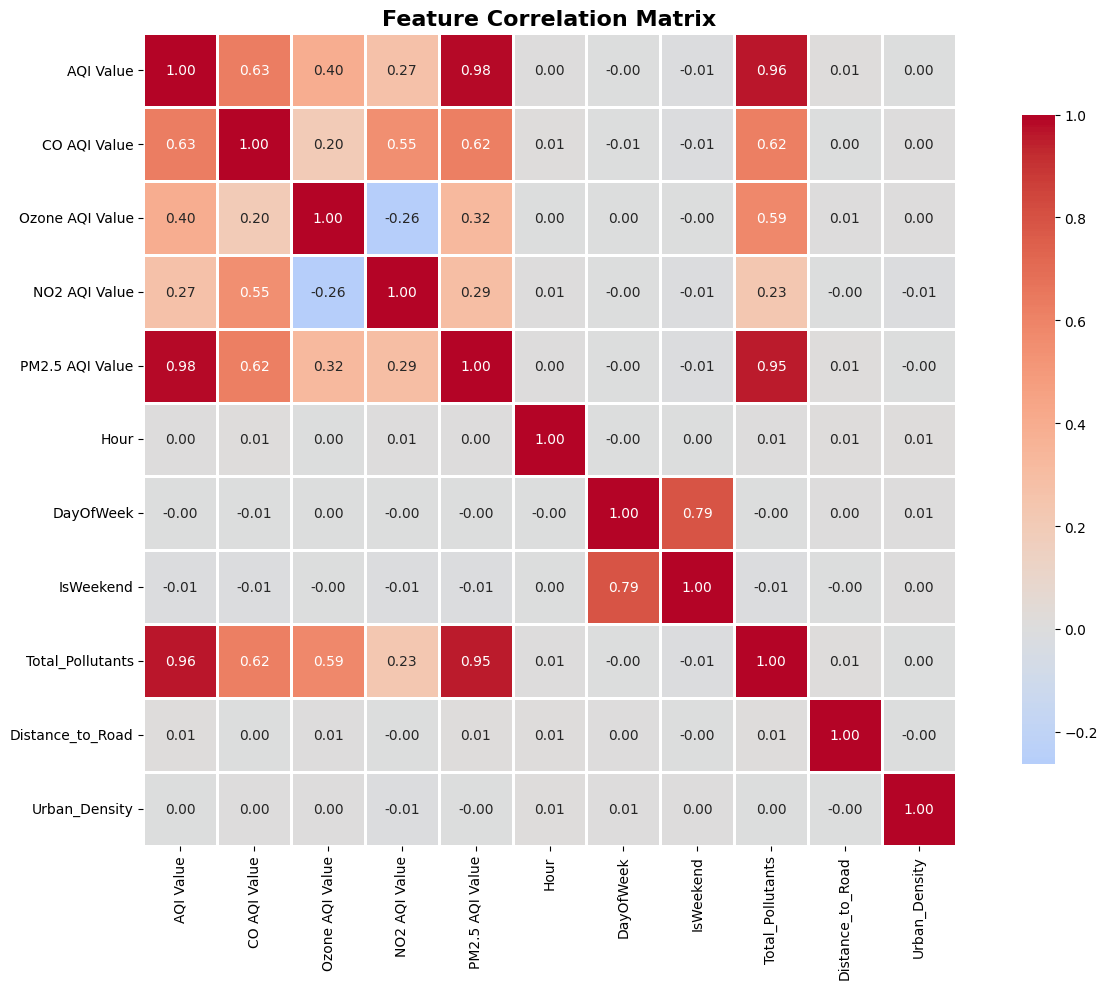

In [28]:
feature_cols = aqi_cols + ['Hour', 'DayOfWeek', 'IsWeekend', 'Total_Pollutants', 
                            'Distance_to_Road', 'Urban_Density']
correlation_matrix = df_featured[feature_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

TEMPORAL PATTERNS

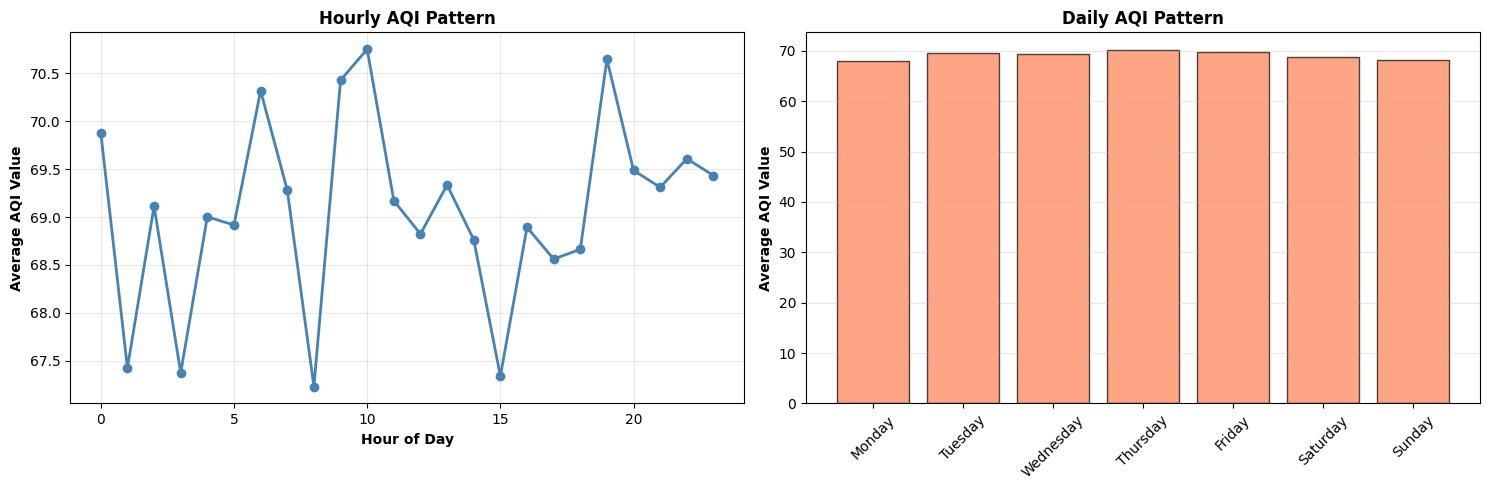

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

hourly_aqi = df_featured.groupby('Hour')['AQI Value'].mean()
axes[0].plot(hourly_aqi.index, hourly_aqi.values, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0].set_xlabel('Hour of Day', fontweight='bold')
axes[0].set_ylabel('Average AQI Value', fontweight='bold')
axes[0].set_title('Hourly AQI Pattern', fontweight='bold')
axes[0].grid(alpha=0.3)

daily_aqi = df_featured.groupby('DayOfWeek')['AQI Value'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1].bar(range(7), daily_aqi.values, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(days, rotation=45)
axes[1].set_ylabel('Average AQI Value', fontweight='bold')
axes[1].set_title('Daily AQI Pattern', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

AQI CATEGORY DISTRIBUTION

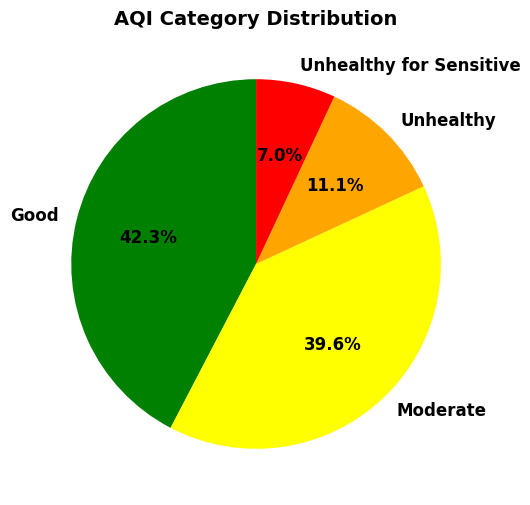

In [30]:
aqi_counts = df_featured['AQI_Level'].value_counts()
colors = ['green', 'yellow', 'orange', 'red', 'darkred']
plt.figure(figsize=(10, 6))
plt.pie(aqi_counts.values, labels=aqi_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('AQI Category Distribution', fontsize=14, fontweight='bold')
plt.show()

FINAL DATASET SUMMARY

In [31]:
print("\n" + "="*60)
print("FINAL ENGINEERED DATASET")
print("="*60)
print(f"Total Rows: {len(df_featured)}")
print(f"Total Columns: {len(df_featured.columns)}")
print("\nNew Features Created:")
new_features = ['Hour', 'DayOfWeek', 'Month', 'Season', 'IsWeekend', 
                'Total_Pollutants', 'CO_PM25_Ratio', 'Ozone_NO2_Ratio',
                'AQI_Level', 'Latitude', 'Longitude', 'Distance_to_Road',
                'Distance_to_Industry', 'Distance_to_DumpSite', 'Urban_Density']
for i, feature in enumerate(new_features, 1):
    print(f"  {i}. {feature}")

print("\nDataset Ready for Machine Learning!")
print(df_featured.head())

# Save the engineered dataset
df_featured.to_csv('air_quality_engineered.csv', index=False)
print("\n✓ Engineered dataset saved as 'air_quality_engineered.csv'")



FINAL ENGINEERED DATASET
Total Rows: 23463
Total Columns: 34

New Features Created:
  1. Hour
  2. DayOfWeek
  3. Month
  4. Season
  5. IsWeekend
  6. Total_Pollutants
  7. CO_PM25_Ratio
  8. Ozone_NO2_Ratio
  9. AQI_Level
  10. Latitude
  11. Longitude
  12. Distance_to_Road
  13. Distance_to_Industry
  14. Distance_to_DumpSite
  15. Urban_Density

Dataset Ready for Machine Learning!
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         26         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Go